## Projeto Ciência de Dados 2 - Previsão de média escolar pelas horas de video game

- Nosso desafio é conseguir prever a expectativa de vida saudável.

### Integrantes: 

- Eduardo 
- Eric
- Felipe 
- Lourenco 

### Técnicas Aplicadas 

- Regressão Linear
- Random Forest 

### Link para o dataset completo

- https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

## Introdução ao tema ...

Nosso dataset escolhido é um relatorio mundial da felicidade , e esse relatório cada vez mais torna-se mais importante , pois a partir dele pode-se tomar medidas para formular politicas.Muitos especialistas afirmam que a qualidade de vida(bem-estar) pode ser uma forma de avaliar o progresso de uma nação.

As pontuações e classificações usam dados da Gallup World Poll.Existe 6 fatores :  produção econômica, suporte social, expectativa de vida, liberdade, ausência de corrupção e generosidade que contribuem para a avaliação.

Assim no presente trabalho, deseja-mos entender como a expectativa de vida saudável de uma nação(target) pode ser prevista a partir desses 6 fatores(variáveis explicativas) e a partir disso qual são a relação entre eles.

### Descrição das colunas importantes para a previsão

- **Life Ladder**:Imagine uma escada, com degraus numerados de 0 na parte inferior a 10 na parte superior. O topo da escada representa a melhor vida possível para você e a base da escada representa a pior vida possível para você.


- **Log GDP per capita**: Em sua interpretação mais básica, o PIB per capita mostra quanto valor de produção econômica pode ser atribuído a cada cidadão individual. Alternativamente, isso se traduz em uma medida de riqueza nacional, uma vez que o valor de mercado do PIB por pessoa também serve prontamente como uma medida de prosperidade.


- **Social support**: o apoio social é definido em termos de características da rede social, como assistência da família, amigos, vizinhos e outros membros da comunidade.


- **Healthy life expectancy**: a expectativa de vida saudável é a média de vida com boa saúde - ou seja, sem limitação irreversível da atividade na vida diária ou incapacidades - de uma geração fictícia sujeita às condições de mortalidade e morbidade prevalecentes naquele ano


- **Freedom to make life choices**: a liberdade de escolha descreve a oportunidade e a autonomia de um indivíduo para realizar uma ação selecionada a partir de pelo menos duas opções disponíveis, sem restrições de partes externas


- **Generosity**: generosidade é a virtude de ser liberal ao dar, geralmente como presentes.


- **Perceptions of corruption**: A corrupção é uma forma de desonestidade ou crime cometido por uma pessoa ou organização a quem foi confiada uma posição de autoridade, para obter benefício ilícito





### Colunas que faltam informação ou não são relevantes para prever a 

- Standard error of **ladder score** : Error Occure while reading Ladder Score of each Country.


- **Upperwhisker** : I don't know this for sure, but maybe it is realted to box-whisker plot.


- **Lowerwhisker**: I don't know this for sure, but maybe it is realted to box-whisker plot.


- **Ladder score in Dystopia**: Ladder Score in Hypothetical Country that has values equal to the world’s lowest national averages.


- Explained by: **Log GDP per capita**: It is mean of Log GDP per capita which is calculated from past dataset of country.


- Explained by: **Social support**: It is mean of Social support value which is calculated from past dataset of country.


- Explained by: **Healthy life expectancy**:  é a média de expectativa de vida saudável, calculada a partir de um conjunto de dados anteriores do país.


- Explained by: **Freedom to make life choices** :É a liberdade de fazer escolhas de vida calculada a partir de um conjunto de dados anteriores do país.


- Explained by: **Generosity**:é a média da generosidade calculada a partir do conjunto de dados anterior do país.



- Explained by: **Perceptions of corruption**: It is mean of Perceptions of corruption which is calculated from past dataset of country.


- **Dystopia + residual**: A Hypothetical Country that has values equal to the world’s lowest national averages.


## Começando o projeto 

In [1]:
import pandas as pd
df = pd.read_csv("world-happiness-report-2021.csv")
display(df)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


## Ajustes de Dados (Tratamento/Limpeza)

O que estamos buscando aqui de forma geral
são:
- Dados faltantes;
- Dados com valor 0(ZERO) quando deveriam ser valores coerentes;
- Outliers que não representam bem o histórico e logo não ajudam a criação do modelo;
- Erros na base;
- Erros de importação;

In [50]:
#remover as colunas apresentam valores nulos 
df = df.dropna(how='any',axis=1)

# colunas que serão importantes para análise
df = df[["Country name", "Healthy life expectancy", "Ladder score", "Social support","Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

df.info() # dados estão numéricos e não nulos como deveriam ser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
Country name                    149 non-null object
Healthy life expectancy         149 non-null float64
Ladder score                    149 non-null float64
Social support                  149 non-null float64
Freedom to make life choices    149 non-null float64
Generosity                      149 non-null float64
Perceptions of corruption       149 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [2]:
display(df)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


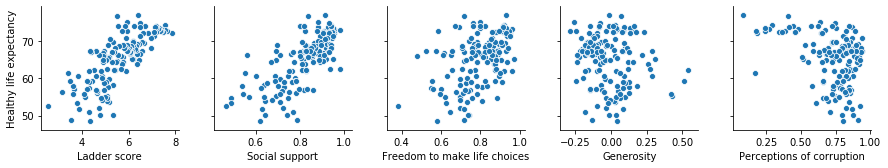

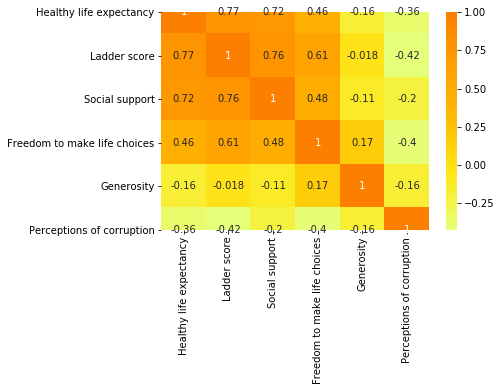

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualizando a correlação do target com as features
sns.pairplot(df,x_vars=["Ladder score", "Social support","Freedom to make life choices", "Generosity", "Perceptions of corruption"], y_vars=['Healthy life expectancy'] )
plt.show()

#mapa de calor que nos mostra a correlação entreas variaveis
sns.heatmap(df.corr(), cmap ='Wistia', annot=True)

#pesquisar argumentos para uma linha 
plt.show()

Aqui, é interessante entender como media se comporta cruzada com cada feature.



Lembrando que:

**Correlação ( -1 <=> 1 )**
- Correlação forte -> próxima de 1.
- Correlaçao media -> 0.4 < corr < 0.7
- Correlação fraca -> próxima de 0.
- Correlação inversa -> -1.



**Objetivo:** prever a expectativa de vida saúdavel a partir das features(Ladder score, Social support,Freedom to make life choices, Generosity,Perceptions of corruption)

Target = Healthy life expectancy(expectativa de vida saudável)



Logo, 



#### Observações

**Ladder score:** Como observado no mapa de calor a correlação é 0.77, portanto uma correlação forte e inicialmente entende que essa variával explicativa pode ser importante para a análise de previsão.<br>

**Social support:** Como observado no mapa de calor a correlação é 0.72, portanto uma correlação forte e inicialmente entende que essa variával explicativa pode ser importante para a análise de previsão.<br>

**Freedom to make life choices:** Como observado no mapa de calor a correlação é 0.46, portanto uma correlação média e inicialmente entende que essa variával explicativa não e tão relevante para a análise de previsão.<br>

**Generosity:** Como observado no mapa de calor a correlação é -0.16, portanto uma correlação fraca e entende que essa variával explicativa não é relevante para a análise de previsão, assim ela será descartada.<br>


**Perceptions of corruption:** Como observado no mapa de calor a correlação é -0.36, portanto uma correlação fraca e entende que essa variával explicativa não é relevante para a análise de previsão, assim ela será descartada.<br>



- 


**...**

In [8]:
import statsmodels.api as sm

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

## Dividindo o dataset em teste e treinamento

In [54]:
from sklearn.model_selection import train_test_split

# é neessário dividr em treinamento e teste para não ocorre o OVERFITTIN (previsão fica muito boa somente para a própio df )

x = df.drop(["Country name","Healthy life expectancy" ] ,axis=1)
y = df["Healthy life expectancy"]

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [55]:
results = regress(y_train,x_train)
results.summary()

C:\Users\felem\AppData\Local\Continuum\anacond\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.669
Model:                                 OLS   Adj. R-squared:                  0.652
Method:                      Least Squares   F-statistic:                     39.53
Date:                     Sun, 06 Jun 2021   Prob (F-statistic):           4.72e-22
Time:                             17:02:07   Log-Likelihood:                -287.15
No. Observations:                      104   AIC:                             586.3
Df Residuals:                           98   BIC:                             602.2
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           36.1631      4.311      8.389      0.000      27.609      44.718
Ladder score                     2.8988      0.659      4.402      0.000       1.592       4.206
Social support                  20.4633      5.772      3.545      0.001       9.009      31.917
Freedom to make life choices    -1.8241      4.433     -0.411      0.682     -10.622       6.974
Generosity                      -5.9923      2.688     -2.229      0.028     -11.327      -0.658
Perceptions of corruption       -3.1083      2.556     -1.216      0.227      -8.180       1.963
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.988
Skew:                          -0.152   Prob(JB):                        0.370
Kurtosis:                       3.605   Cond. No.                         92.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Análise da importancia de cada feature a partir do valor-p

- Ladder Score: 
- Social Support:
- Freedom to make life choices:
- Generosity:
- Perceptions of corruption:


## Modelos de Predicao 

### 1. Regressão linear ... 


### 2. Random Forest ... 


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

#Regressão Linear
lin_reg = LinearRegression()
results_RL = lin_reg.fit(x_train, y_train)

#Random Forest
rf_reg = RandomForestRegressor()
results_RF = rf_reg.fit(x_train, y_train)


C:\Users\felem\AppData\Local\Continuum\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
#Teste AI com Regressão Linear
test_pred_lin = results_RL.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)

print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")

print('-----------------------------------------------')

#Teste AI com Random Forest
test_pred_rf = results_RF.predict(x_test)

r2_rf = metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)

print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.6337177299166272
MSE da Regressão Linear: 17.56570605369143
-----------------------------------------------
R² do Random Forest: 0.6023834727269688
MSE do Random Forest: 19.068395089333325


**Visualização Gráfica das Previsões**

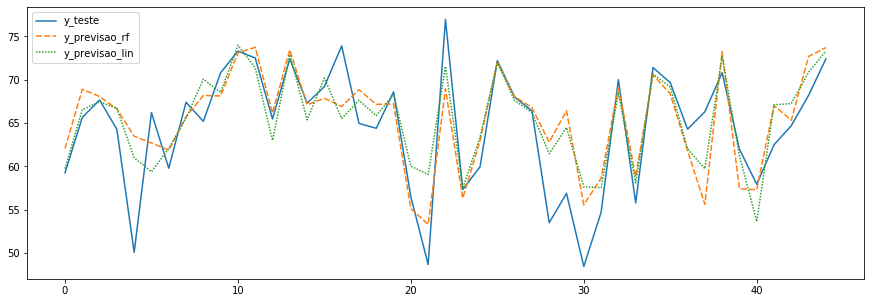

,y_teste,y_previsao_rf,y_previsao_lin
0,59.269,62.0590,59.737972
1,65.656,68.8900,66.539031
2,67.657,68.0599,67.446613
3,64.281,66.6414,66.705675
4,50.114,63.4791,60.999001
5,66.208,62.7071,59.391686
6,59.802,61.8697,62.087097
7,67.401,65.7239,65.569917
8,65.200,68.1859,70.057005
9,70.799,68.1203,68.535249


In [58]:
df_resultado = pd.DataFrame()

# df_resultado.index = x_test
df_resultado['y_teste'] = y_test 

df_resultado['y_previsao_rf'] = test_pred_rf # Coluna de previsão da Random Forest
df_resultado['y_previsao_lin'] = test_pred_lin # Coluna de previsão da Regressão Linear

df_resultado = df_resultado.reset_index(drop=True) # acertar o index na ordmem

plt.figure(figsize=(15, 5))

sns.lineplot(data=df_resultado)
plt.show()

display(df_resultado)

**Importancia de cada feature para a previsão da expectativa**

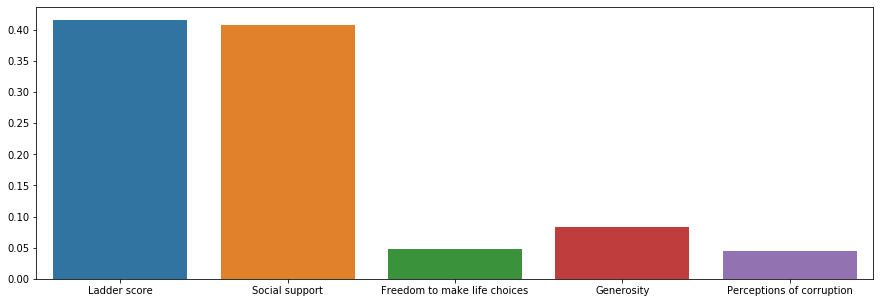

In [59]:
# importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)

plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

## Conclusão 